# *Customer Segmentation Analysis*

In [ ]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## *Load Dataset*

In [1]:
df=pd.read_csv('Mall_Customers.csv')

NameError: ignored

In [ ]:
dff=df.copy() #Make a copy of dataset

In [ ]:
dff.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dff.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
dff.shape

(200, 5)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## *Handle Missing Values*

In [ ]:
dff.isnull().any() #In this Dataset,there is no missing value

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
dff.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
dff=dff.drop(columns=['CustomerID'],axis=1) #Drop unused column

In [ ]:
dff.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## *Data Visualization*

### *i. Uni-variate Analysis*

C:\Users\God\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

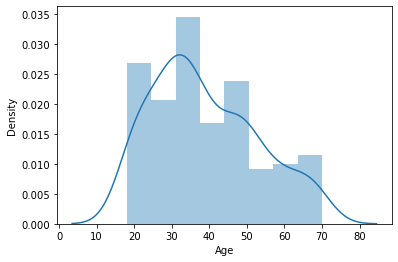

In [ ]:
sns.distplot(dff.Age)

### The Age values lies between 18 and 70

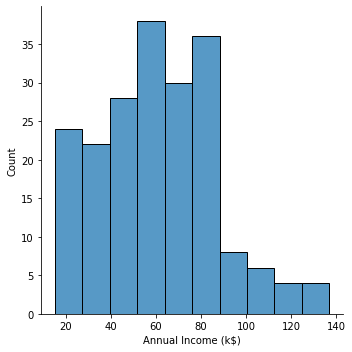

In [ ]:
sns.displot(dff['Annual Income (k$)'])

<AxesSubplot:>

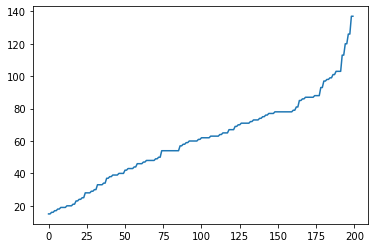

In [ ]:
dff['Annual Income (k$)'].plot()

C:\Users\God\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

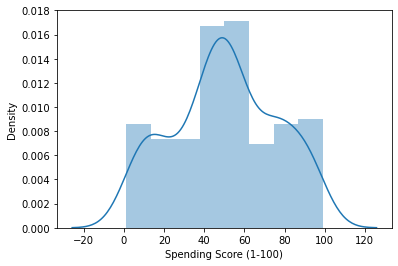

In [ ]:
sns.distplot(dff['Spending Score (1-100)'])

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Gender'>

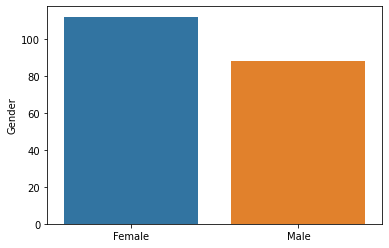

In [ ]:
sns.barplot(dff.Gender.value_counts().index,dff.Gender.value_counts())

### *ii. Bi-variate Analysis*

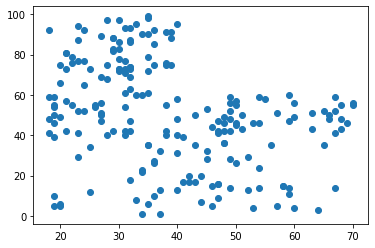

In [ ]:
plt.scatter(dff.Age,df['Spending Score (1-100)'])

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


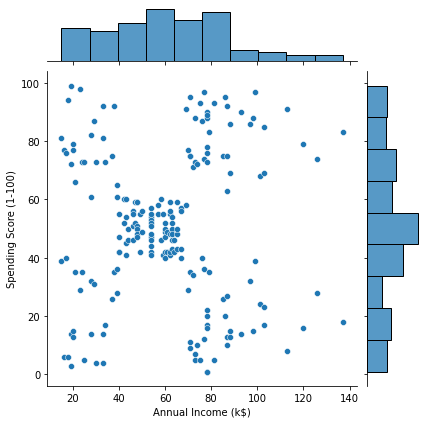

In [ ]:
sns.jointplot(dff['Annual Income (k$)'],dff['Spending Score (1-100)'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

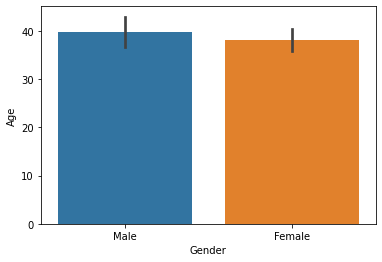

In [ ]:
sns.barplot(x=dff.Gender,y=dff.Age)

### *iii. Multi-variate Analysis*

<AxesSubplot:>

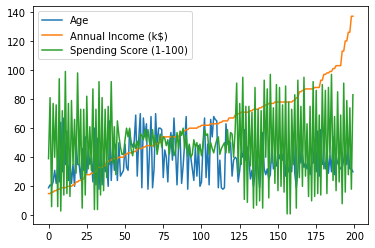

In [ ]:
dff.plot()

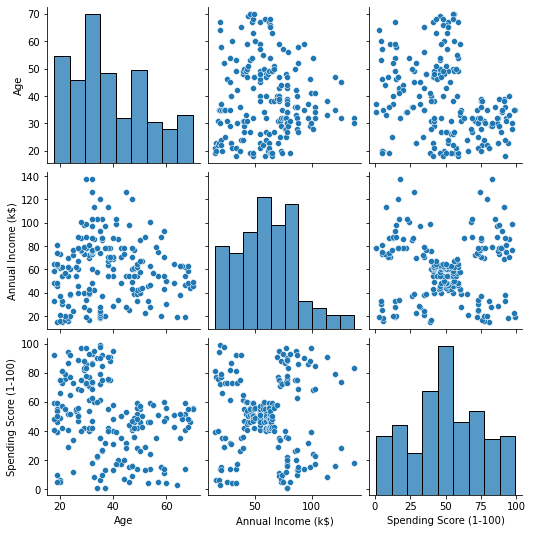

In [ ]:
sns.pairplot(dff)

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

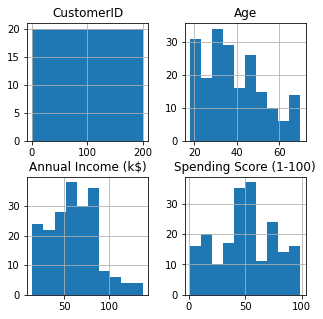

In [ ]:
df.hist(figsize=(5,5))

## *Encoding Categorical Column*

In [ ]:
le=LabelEncoder()

In [ ]:
dff.Gender=le.fit_transform(dff.Gender)

In [ ]:
dff.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## *Descriptive Statistics*

In [ ]:
dff.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [ ]:
dff.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<AxesSubplot:>

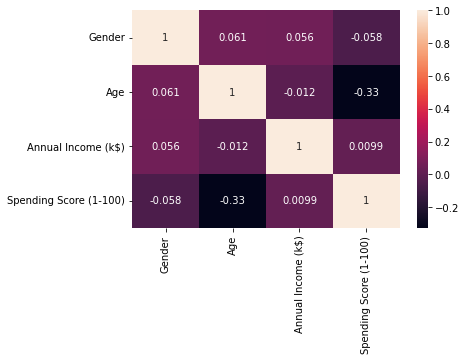

In [ ]:
sns.heatmap(dff.corr(),annot=True)

## *Outlier Analysis*

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender'>

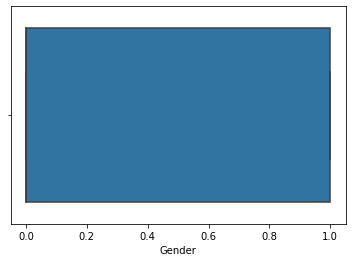

In [ ]:
sns.boxplot(dff.Gender)

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

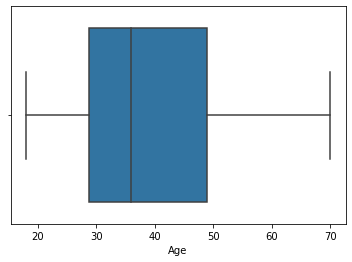

In [ ]:
sns.boxplot(dff.Age)

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

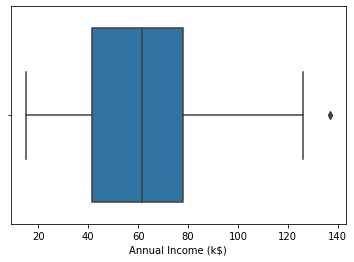

In [ ]:
sns.boxplot(dff['Annual Income (k$)'])

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

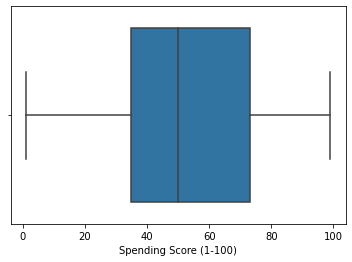

In [ ]:
sns.boxplot(dff['Spending Score (1-100)'])

## *Perform Clustering Algorithm*

In [ ]:
from sklearn import cluster

In [ ]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(dff)
    error.append(kmeans.inertia_)

C:\Users\God\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
error

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51132.70321257689,
 44392.115665679354,
 41000.874221320715,
 37649.692254297435]

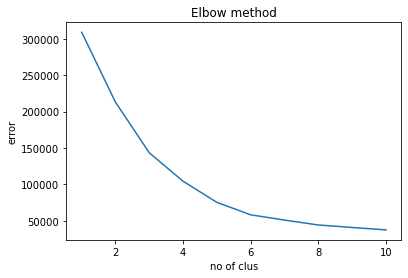

In [ ]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [ ]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [ ]:
km_model.fit(dff)

KMeans(n_clusters=3, random_state=0)

In [ ]:
ykmeans =km_model.predict(dff)

In [ ]:
km_model.predict([[5.1,3.5,1.4,0.2]])

C:\Users\God\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

## *Add the cluster data with the primary dataset*

In [ ]:
dff['kclus'] = pd.Series(ykmeans)

In [ ]:
dff.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2


In [ ]:
dff['kclus'].value_counts()

2    123
1     39
0     38
Name: kclus, dtype: int64

## *Split the data into Independent and Dependent variable*

In [ ]:
X= dff.iloc[:,:-1]

In [ ]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
y=dff.kclus

In [ ]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: kclus, dtype: int32

## *Scaling Independent variable*

In [ ]:
scale=MinMaxScaler()

In [ ]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


## *Split the Data into Training and Tesing*

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

## *Model Building*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred1 = model.predict(x_train)

## *Evaluation Metrics*

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print('Test accuracy score: ',accuracy_score(y_test,y_pred))
print('Training accuracy score: ',accuracy_score(y_train,y_pred1))

Test accuracy score:  1.0
Training accuracy score:  0.99375


In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
kclus,,,
0,9,0,0
1,0,5,0
2,0,0,26


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        26

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

